In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score 


In [2]:
movie_train = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/train_data.txt'
movie_datatrain = pd.read_csv( movie_train, sep=':::', engine='python', names=['Title', 'Genre', 'Description'])


In [3]:
movie_datatrain.head()


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


In [4]:
movie_datatrain.head(100)


,Title,Genre,Description
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...
...,...,...,...
96,[Rec] 2: En un mundo de infectados (2010),documentary,This feature documentary follows the various ...
97,Agni kai atimasmeni (1962),drama,"As indicated by the title, this is an obvious..."
98,Dr. Del (2016),drama,Del Canyon reluctantly returns to his small h...
99,Henry & Verlin (1996),drama,"Verlin is 9 years old and does not talk, nor ..."


In [5]:
movie_test = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data.txt'
movie_datatest = pd.read_csv( movie_test, sep=':::', engine='python', names=['ID', 'Title', 'Description'])
movie_datatest.head()

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


In [6]:
movie_datatest.head(100)

,ID,Title,Description
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...
...,...,...,...
95,96,"""Showcase"" (2015)",Jason Thompson presents a selection of some o...
96,97,"Cinderelas, Lobos e Um Príncipe Encantado (20...",Around 900 thousand people are trafficked a y...
97,98,It's All in Your Mind (1938),"Wilbur Crane is a meek, mild-mannered bookkee..."
98,99,The Ouija Experiment 2: Theatre of Death (2015),A fun filled weekend turns deadly when a grou...


In [7]:
movie_datatrain.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [8]:
movie_datatrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54214 entries, 1 to 54214
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Title        54214 non-null  object
 1   Genre        54214 non-null  object
 2   Description  54214 non-null  object
dtypes: object(3)
memory usage: 1.7+ MB


In [9]:
movie_datatrain.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [10]:
movie_datatest.isnull().sum()

ID             0
Title          0
Description    0
dtype: int64

In [11]:
movie_datatest.describe()

,ID
count,54200.000000
mean,27100.500000
std,15646.336632
min,1.000000
25%,13550.750000
50%,27100.500000
75%,40650.250000
max,54200.000000


## visualizing the data

Text(0, 0.5, 'Count')

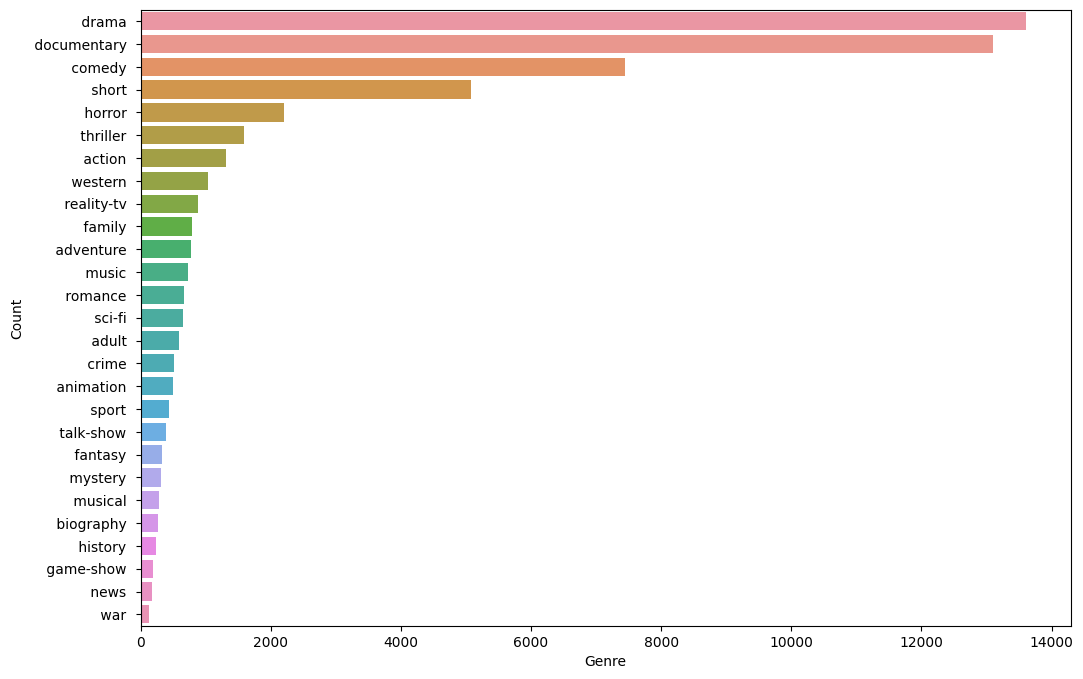

In [12]:
plt.figure(figsize=(12,8))
counts = movie_datatrain.Genre.value_counts()
sns.barplot(x=counts, y=counts.index, orient='h')
plt.xlabel('Genre')
plt.ylabel('Count')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26]),
 [Text(0, 0, ' drama '),
  Text(1, 0, ' documentary '),
  Text(2, 0, ' comedy '),
  Text(3, 0, ' short '),
  Text(4, 0, ' horror '),
  Text(5, 0, ' thriller '),
  Text(6, 0, ' action '),
  Text(7, 0, ' western '),
  Text(8, 0, ' reality-tv '),
  Text(9, 0, ' family '),
  Text(10, 0, ' adventure '),
  Text(11, 0, ' music '),
  Text(12, 0, ' romance '),
  Text(13, 0, ' sci-fi '),
  Text(14, 0, ' adult '),
  Text(15, 0, ' crime '),
  Text(16, 0, ' animation '),
  Text(17, 0, ' sport '),
  Text(18, 0, ' talk-show '),
  Text(19, 0, ' fantasy '),
  Text(20, 0, ' mystery '),
  Text(21, 0, ' musical '),
  Text(22, 0, ' biography '),
  Text(23, 0, ' history '),
  Text(24, 0, ' game-show '),
  Text(25, 0, ' news '),
  Text(26, 0, ' war ')])

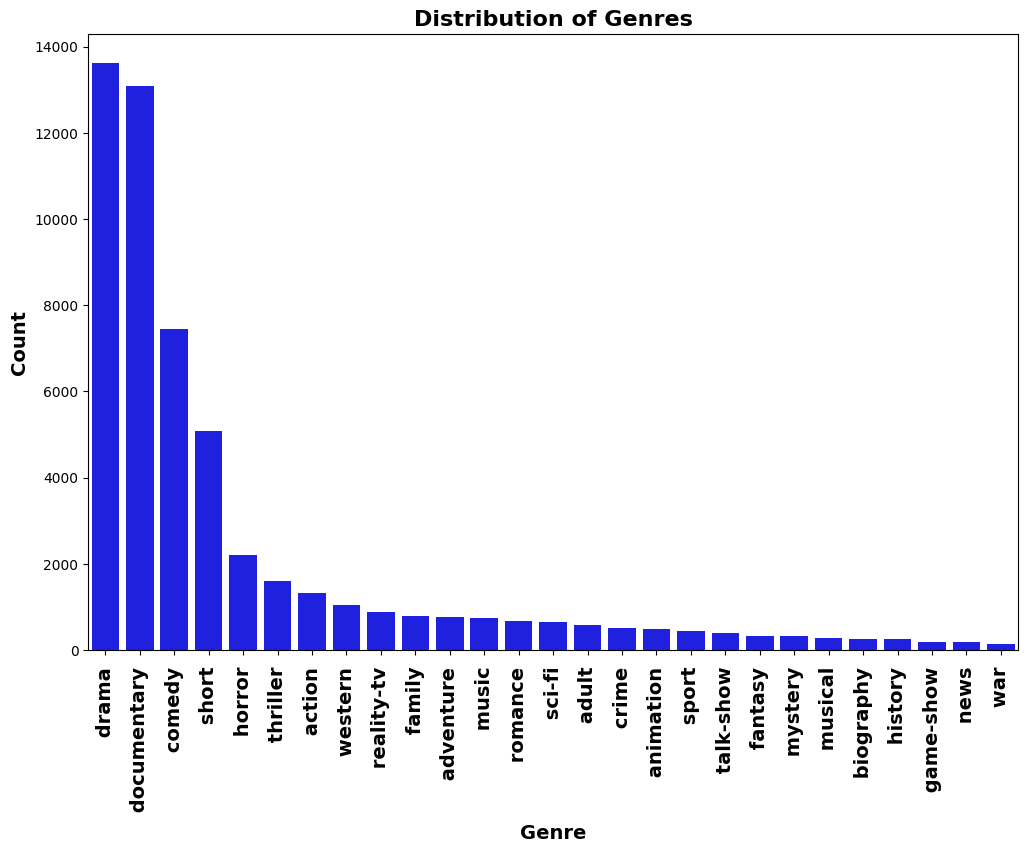

In [13]:
plt.figure(figsize=(12,8))
counts = movie_datatrain.Genre.value_counts()
sns.barplot(x=counts.index, y=counts, color='blue')
plt.xlabel('Genre' ,fontsize=14, fontweight='bold')
plt.ylabel('Count', fontsize=14, fontweight='bold')
plt.title('Distribution of Genres', fontsize=16, fontweight='bold')
plt.xticks(rotation=90, fontsize=14, fontweight='bold')


In [14]:
movie_datatrain['length'] = movie_datatrain['Description'].apply(len)


In [15]:
movie_datatrain.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


In [16]:
movie_datatrain["Genre"].value_counts()

Genre
 drama           13613
 documentary     13096
 comedy           7447
 short            5073
 horror           2204
 thriller         1591
 action           1315
 western          1032
 reality-tv        884
 family            784
 adventure         775
 music             731
 romance           672
 sci-fi            647
 adult             590
 crime             505
 animation         498
 sport             432
 talk-show         391
 fantasy           323
 mystery           319
 musical           277
 biography         265
 history           243
 game-show         194
 news              181
 war               132
Name: count, dtype: int64

In [17]:
movie_datatrain['length']=movie_datatrain['Description'].apply(len)

In [18]:
movie_datatrain.head()

,Title,Genre,Description,length
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625


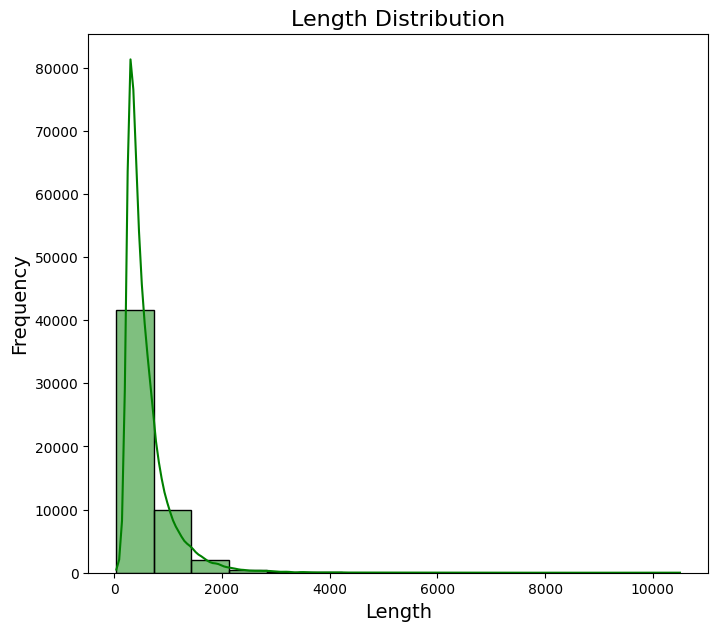

In [19]:
plt.figure(figsize=(8,7))
sns.histplot(data=movie_datatrain, x='length', bins=15, kde=True, color='green')
plt.xlabel('Length', fontsize=14, fontweight='light')
plt.ylabel('Frequency', fontsize=14, fontweight='light')
plt.title('Length Distribution', fontsize=16, fontweight='light')
plt.show()

## cleaning data and preprocessing

In [20]:
stemmer = LancasterStemmer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = re.sub('-',' ',text.lower())
    text = re.sub(f'[{string.digits}]',' ',text)
    text = ' '.join([stemmer.stem(word) for word in text.split() if word not in stop_words])
    text = re.sub(r'@\S+', '', text)
    text = re.sub(r'http\S+', '', text) 
    text = re.sub(r"[^a-zA-Z+']", ' ',text)
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text+' ') 
    text = "".join([i for i in text if i not in string.punctuation])
    words = nltk.tokenize.word_tokenize(text,language="english", preserve_line=True)
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([i for i in words if i not in stopwords and len(i)>2])

    text = re.sub("\s[\s]+", " ", text).strip()
    return re.sub(f'[{re.escape(string.punctuation)}]','',text)
                  
input_text = "Certainly you get a significant boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38" 
print(f'Original text: {input_text}') 
print(f'cleaned text: {clean_text(input_text)}')
                  
                  
                  

Original text: Certainly you get a significant boost from hello bye the the hi -iv iem-k q934*2yee !*3 2e38
cleaned text: certain get sign boost hello bye iem


In [21]:
movie_datatrain['Text_cleaning'] = movie_datatrain.Description.apply(clean_text)
movie_datatest['Text_cleaning'] = movie_datatest.Description.apply(clean_text)
movie_datatrain.head()

,Title,Genre,Description,length,Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...


In [22]:
movie_datatrain['length_Text_cleaning']=movie_datatrain['Text_cleaning'].apply(len)
movie_datatrain.head()

,Title,Genre,Description,length,Text_cleaning,length_Text_cleaning
1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...,546,list convers doct parents year old osc learn n...,324
2,Cupid (1997),thriller,A brother and sister with a past incestuous r...,184,broth sist past incestu rel cur murd relations...,83
3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...,650,bus empty stud field trip muse nat history lit...,325
4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...,1082,help unemploy fath mak end meet edi twin sist ...,616
5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...,625,films titl ref recov body ground zero also sta...,282


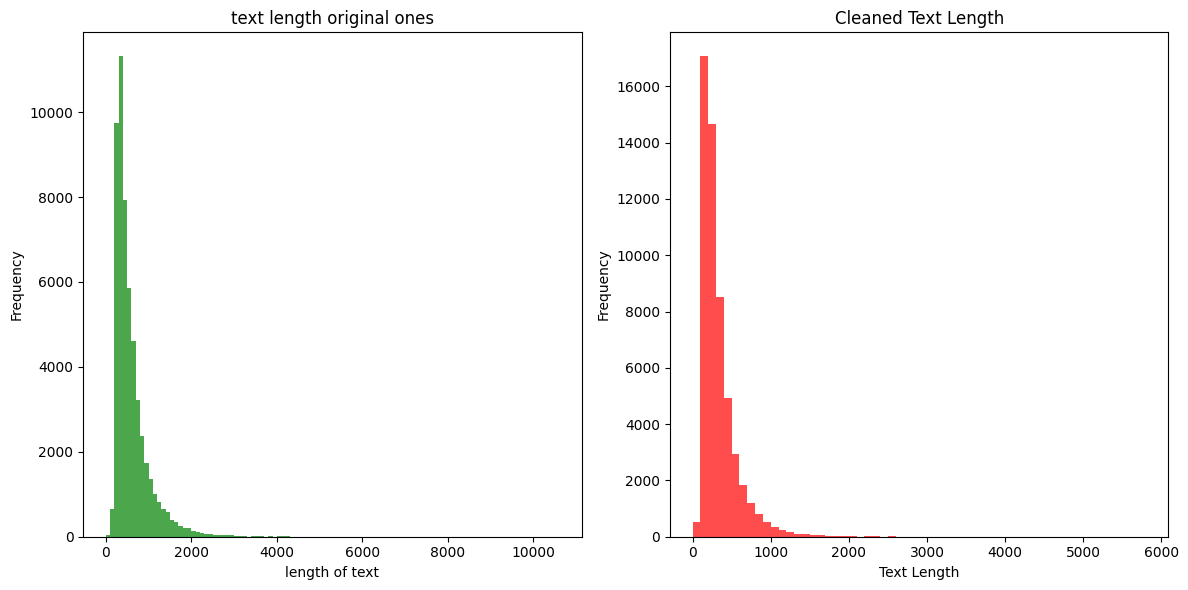

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
original_lengths = movie_datatrain['Description'].apply(len)
plt.hist(original_lengths, bins=range(0, max(original_lengths) +100, 100), color='green', alpha=0.7)
plt.title('text length original ones')
plt.xlabel("length of text")
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
cleaned_lengths = movie_datatrain['Text_cleaning'].apply(len)
plt.hist(cleaned_lengths, bins=range(0, max(cleaned_lengths) +100, 100), color='red', alpha=0.7)
plt.title('Cleaned Text Length')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [26]:
(movie_datatrain['length_Text_cleaning']>2000).value_counts()

length_Text_cleaning
False    54131
True        83
Name: count, dtype: int64

In [29]:
print('Dataframe size (before removal): ', len(movie_datatrain))
filt=movie_datatrain['length_Text_cleaning']>2000
movie_datatrain.drop(movie_datatrain[filt].index, axis=0, inplace=True)
print('Dataframe size(after removal): ', len(movie_datatrain))
print(f'Removed rows: {filt.sum()}')

Dataframe size (before removal):  54214
Dataframe size(after removal):  54131
Removed rows: 83


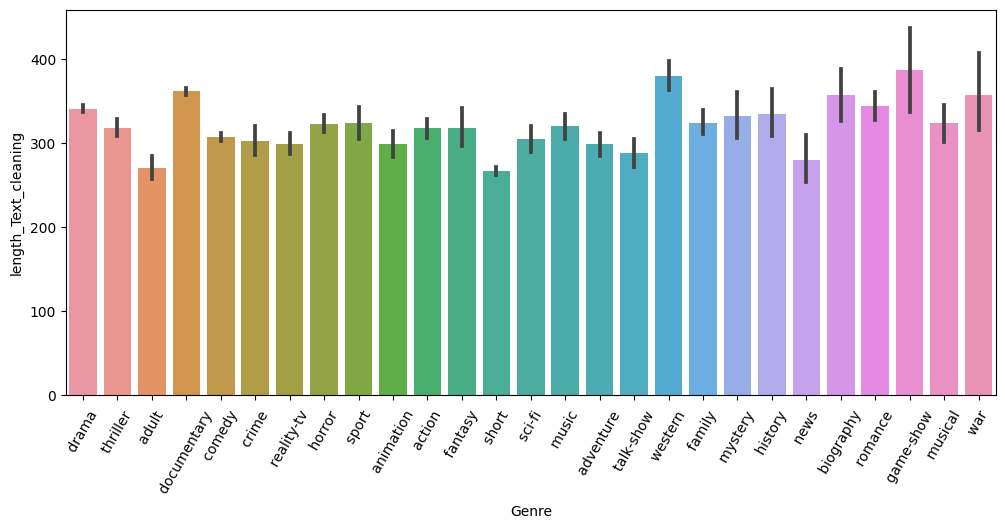

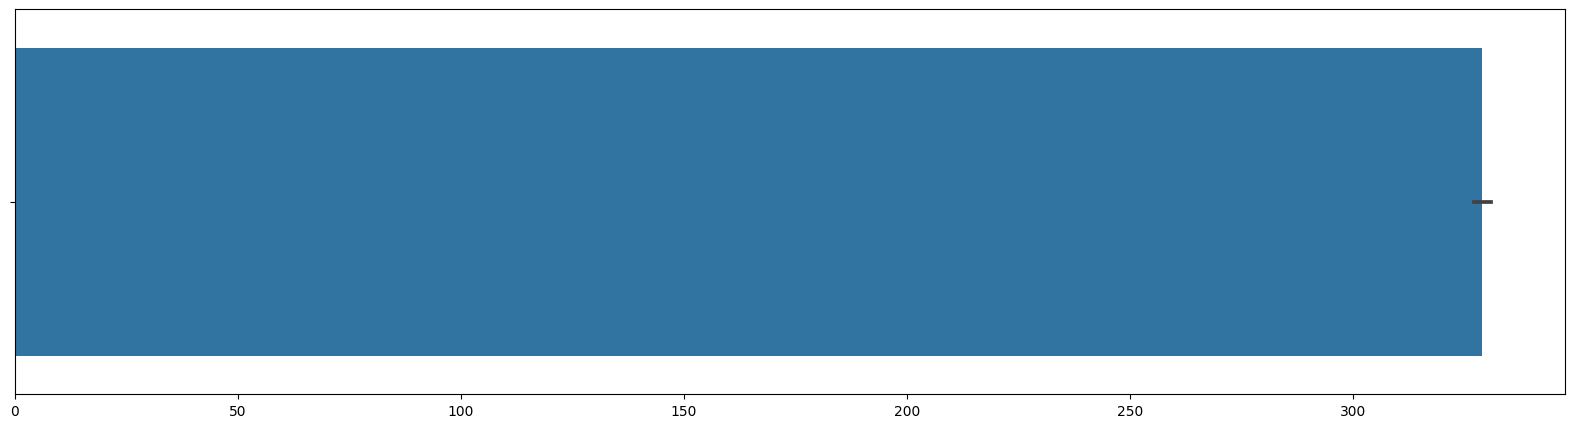

In [34]:
plt.figure(figsize=(12,5))
sns.barplot(x='Genre', y='length_Text_cleaning', data=movie_datatrain)
plt.xticks(rotation=60)
plt.show()
plt.figure(figsize=(20,5))
sns.barplot(x=movie_datatrain['length_Text_cleaning'].values,hue='Genre', data=movie_datatrain)
plt.show()

## model selection and training the model and testing it

In [35]:
## importing necessary libraries for model selection and training

In [44]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.model_selection import train_test_split

from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.callbacks import EarlyStopping


##  TF IDF vectorization and tokenization


In [46]:
num_words = 50000
max_len = 250
tokenizer = Tokenizer(num_words=num_words, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
tokenizer.fit_on_texts(movie_datatrain['Text_cleaning'].values)

In [49]:
movie_testpath = '/kaggle/input/genre-classification-dataset-imdb/Genre Classification Dataset/test_data_solution.txt'
movie_datasolution = pd.read_csv(movie_testpath, sep=':::', engine='python', names=['ID', 'Title', 'Genre', 'Description'])
movie_datasolution.head(100)

,ID,Title,Genre,Description
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...
...,...,...,...,...
95,96,"""Showcase"" (2015)",music,Jason Thompson presents a selection of some o...
96,97,"Cinderelas, Lobos e Um Príncipe Encantado (20...",documentary,Around 900 thousand people are trafficked a y...
97,98,It's All in Your Mind (1938),drama,"Wilbur Crane is a meek, mild-mannered bookkee..."
98,99,The Ouija Experiment 2: Theatre of Death (2015),horror,A fun filled weekend turns deadly when a grou...


## vectorization of text (TF-IDF)

In [54]:
X = tokenizer.texts_to_sequences(movie_datatrain['Text_cleaning'].values)
X = pad_sequences(X, maxlen=max_len)
y = pd.get_dummies(movie_datatrain['Genre']).values
X_test = tokenizer.texts_to_sequences(movie_datatest['Text_cleaning'].values)
X_test = pad_sequences(X_test, maxlen=max_len)
y_test = pd.get_dummies(movie_datasolution['Genre']).values

In [55]:
## building the LSTM model

In [58]:
EMBEDDING_DIM = 100
model = Sequential()
model.add(Embedding(num_words, EMBEDDING_DIM, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.1, recurrent_dropout=0.2))
model.add(Dense(27, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam', metrics=['accuracy'])


In [59]:
# Training the model

In [60]:
my_callbacks = [EarlyStopping(monitor='val_loss', min_delta=0, patience=2, mode='auto')]
history = model.fit(X, y, epochs=6, batch_size=32, validation_data=(X_test,y_test), callbacks=my_callbacks)

Epoch 1/6
1692/1692 [==============================] - 697s 410ms/step - loss: 1.9618 - accuracy: 0.4279 - val_loss: 1.7092 - val_accuracy: 0.5017
Epoch 2/6
1692/1692 [==============================] - 694s 410ms/step - loss: 1.4439 - accuracy: 0.5812 - val_loss: 1.5474 - val_accuracy: 0.5435
Epoch 3/6
1692/1692 [==============================] - 696s 412ms/step - loss: 1.1223 - accuracy: 0.6745 - val_loss: 1.6011 - val_accuracy: 0.5437
Epoch 4/6
1692/1692 [==============================] - 691s 408ms/step - loss: 0.8570 - accuracy: 0.7480 - val_loss: 1.7136 - val_accuracy: 0.5405


## plotting it

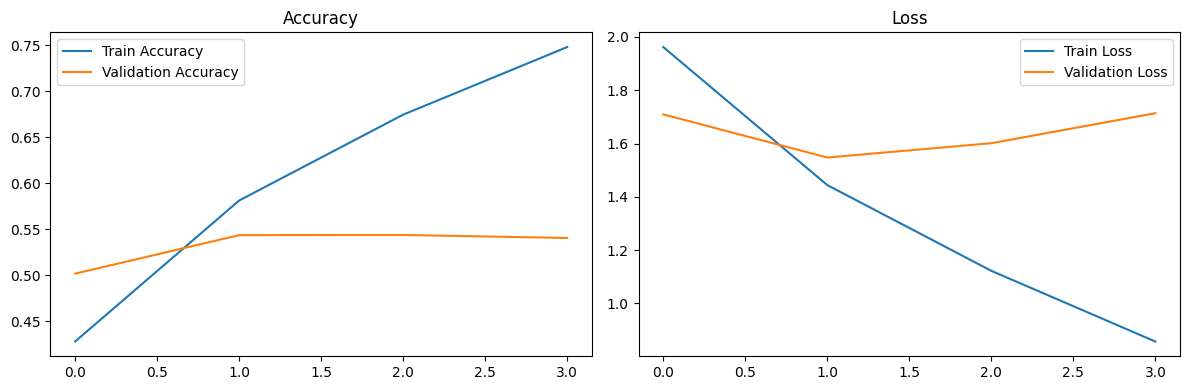

In [63]:
plt.figure(figsize=(12,4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.tight_layout()
plt.show()


In [72]:
x = movie_datatrain["Text_cleaning"]
y = movie_datatrain["Genre"]

x_train ,x_test ,y_train ,y_test = train_test_split(x ,y ,test_size = 0.5)

In [76]:
vectorize = CountVectorizer()
x_train1 = vectorize.fit_transform(x_train)
x_test1 = vectorize.transform(x_test)

## using TF-IDF vectorizer technique

In [75]:
vectorizer = TfidfVectorizer()
x_train2 = vectorize.fit_transform(x_train)
x_test2 =  vectorize.transform(x_test)

### multinomial with TF-IDF Vectorizer

In [79]:
mul = MultinomialNB()
mul.fit(x_train2, y_train)
print("actual score on training data", mul.score(x_train2, y_train))
print("Model Score on Training data", mul.score(x_test2, y_test))
y_preds = mul.predict(x_test2)
print(classification_report(y_preds, y_test))

actual score on training data 0.6244226861259929
Model Score on Training data 0.49789403679893596


/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


               precision    recall  f1-score   support

      action        0.02      0.71      0.03        14
       adult        0.01      0.50      0.01         4
   adventure        0.02      0.44      0.04        18
   animation        0.00      0.00      0.00         0
   biography        0.00      0.00      0.00         0
      comedy        0.38      0.51      0.44      2800
       crime        0.00      0.00      0.00         0
 documentary        0.89      0.54      0.67     10760
       drama        0.82      0.44      0.57     12712
      family        0.00      0.00      0.00         0
     fantasy        0.00      0.00      0.00         3
   game-show        0.02      1.00      0.04         2
     history        0.00      0.00      0.00         0
      horror        0.16      0.75      0.26       232
       music        0.01      0.83      0.03         6
     musical        0.00      0.00      0.00         0
     mystery        0.00      0.00      0.00         1
        n

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### logistic regression with TF-IDF Vectorizer

In [83]:
modl = LogisticRegression()
modl.fit(x_train2, y_train)
print("actual model score on training data", modl.score(x_train2,y_train))
print("actual model score on training data", modl.score(x_test2,y_test))
y_preds = modl.predict(x_test2)
print(classification_report(y_preds, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


actual model score on training data 0.9975983742841308
actual model score on training data 0.536281681814823
               precision    recall  f1-score   support

      action        0.26      0.39      0.32       431
       adult        0.32      0.54      0.41       179
   adventure        0.18      0.34      0.24       206
   animation        0.13      0.30      0.18       103
   biography        0.00      0.00      0.00        13
      comedy        0.53      0.50      0.51      3962
       crime        0.07      0.22      0.11        83
 documentary        0.75      0.68      0.71      7284
       drama        0.67      0.53      0.59      8645
      family        0.12      0.24      0.16       186
     fantasy        0.06      0.24      0.09        37
   game-show        0.60      0.71      0.65        79
     history        0.01      0.14      0.02         7
      horror        0.54      0.61      0.57       956
       music        0.46      0.57      0.51       294
     music

### support vector machine (SVC) with TF-IDFVectorizer

In [85]:
svm = LinearSVC()
svm.fit(x_train2, y_train)
print("Model accuracy score on training data", svm.score(x_train2, y_train))
print("Model accuracy score on training data", svm.score(x_test2, y_test))
y_pred = svm.predict(x_test2)
print(classification_report(y_pred, y_test))

/opt/conda/lib/python3.10/site-packages/sklearn/svm/_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Model accuracy score on training data 0.9997783114723813
Model accuracy score on training data 0.48703170028818443
               precision    recall  f1-score   support

      action        0.23      0.29      0.25       518
       adult        0.33      0.44      0.38       225
   adventure        0.19      0.24      0.21       311
   animation        0.12      0.19      0.15       151
   biography        0.01      0.02      0.01        50
      comedy        0.47      0.46      0.47      3876
       crime        0.06      0.12      0.08       127
 documentary        0.70      0.66      0.68      6892
       drama        0.58      0.51      0.54      7797
      family        0.11      0.17      0.14       257
     fantasy        0.09      0.15      0.11        92
   game-show        0.59      0.59      0.59        94
     history        0.01      0.03      0.01        35
      horror        0.51      0.52      0.51      1077
       music        0.42      0.50      0.46       306
    